<a href="https://colab.research.google.com/github/AlexeyTri/PyTorchTutorials/blob/main/Tutorial5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training pipeline

- prediction: PyTorch Model
- Gradients Computation: Autograd
- Loss Computation: PyTorch Loss
- Parameters updates: PyTorch Optimizer

1 - Desing model (input, output size, forward pass)

2 - Constractor loss and optimizer

3 - Training loop

    - forward pass: compute prediction

    - backward pass: gradients
    
    - update weights

In [39]:
import torch
import torch.nn as nn
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

In [40]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

In [41]:
# 1) model
n_samples, n_features = X.shape
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [42]:
# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epoch: 10, loss = 4443.1704
epoch: 20, loss = 3311.8682
epoch: 30, loss = 2493.9497
epoch: 40, loss = 1901.9398
epoch: 50, loss = 1472.9971
epoch: 60, loss = 1161.9044
epoch: 70, loss = 936.0823
epoch: 80, loss = 772.0227
epoch: 90, loss = 652.7437
epoch: 100, loss = 565.9620


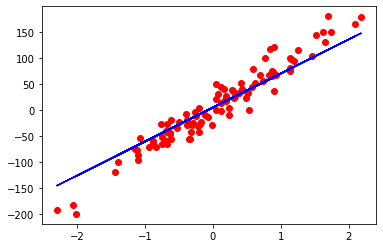

In [43]:
# 3) training loop
num_epoch = 100
for epoch in range(num_epoch):
    # forward pass and loss
    y_prediction = model(X)
    loss = criterion(y_prediction, y)

    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    optimizer.zero_grad()

    if (epoch +1) %10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot

predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()